In [1]:
import pandas as pd
from mlforecast import MLForecast
from xgboost import XGBRegressor
from utilsforecast.plotting import plot_series
from window_ops.rolling import rolling_mean, rolling_std, rolling_min, rolling_max
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('MLTempDataset.csv')
df.drop(columns=['Unnamed: 0',],inplace=True)#'Datetime1'
df.tail()

,Datetime1,DAYTON_MW,Datetime
6671,19,27.350,2022-10-08 23:00:00
6672,20,26.800,2022-10-09 00:00:00
6673,21,26.450,2022-10-09 01:00:00
6674,22,25.900,2022-10-09 02:00:00
6675,23,25.567,2022-10-09 03:00:00


In [3]:
df1=df.copy()
df1['unique_id']='h1'
# df1['unique_id']=
df1['ds']=pd.to_datetime(df['Datetime'])
df1['y']=df['DAYTON_MW']
df1.head()

,Datetime1,DAYTON_MW,Datetime,unique_id,ds,y
0,0,20.867,2022-01-04 00:00:00,h1,2022-01-04 00:00:00,20.867
1,1,21.000,2022-01-04 01:00:00,h1,2022-01-04 01:00:00,21.000
2,2,20.867,2022-01-04 02:00:00,h1,2022-01-04 02:00:00,20.867
3,3,20.650,2022-01-04 03:00:00,h1,2022-01-04 03:00:00,20.650
4,4,20.400,2022-01-04 04:00:00,h1,2022-01-04 04:00:00,20.400


In [4]:

df1.drop(columns=['Datetime','DAYTON_MW'],inplace=True)


In [5]:
df1.head()

,Datetime1,unique_id,ds,y
0,0,h1,2022-01-04 00:00:00,20.867
1,1,h1,2022-01-04 01:00:00,21.000
2,2,h1,2022-01-04 02:00:00,20.867
3,3,h1,2022-01-04 03:00:00,20.650
4,4,h1,2022-01-04 04:00:00,20.400


In [6]:
# # df1['unique_id']=df1['unique_id'].astype('category')
# # df1['unique_id']='h1'
# df1['unique_id']=df1['unique_id'].astype(str)
# df1['unique_id'].dtype

In [7]:
df1['y'].dtype

dtype('float64')

In [8]:
ts=rolling_mean(df1['y'].values,window_size=10)
# ts.dropna(inplace=True)
ts=ts[~np.isnan(ts)]


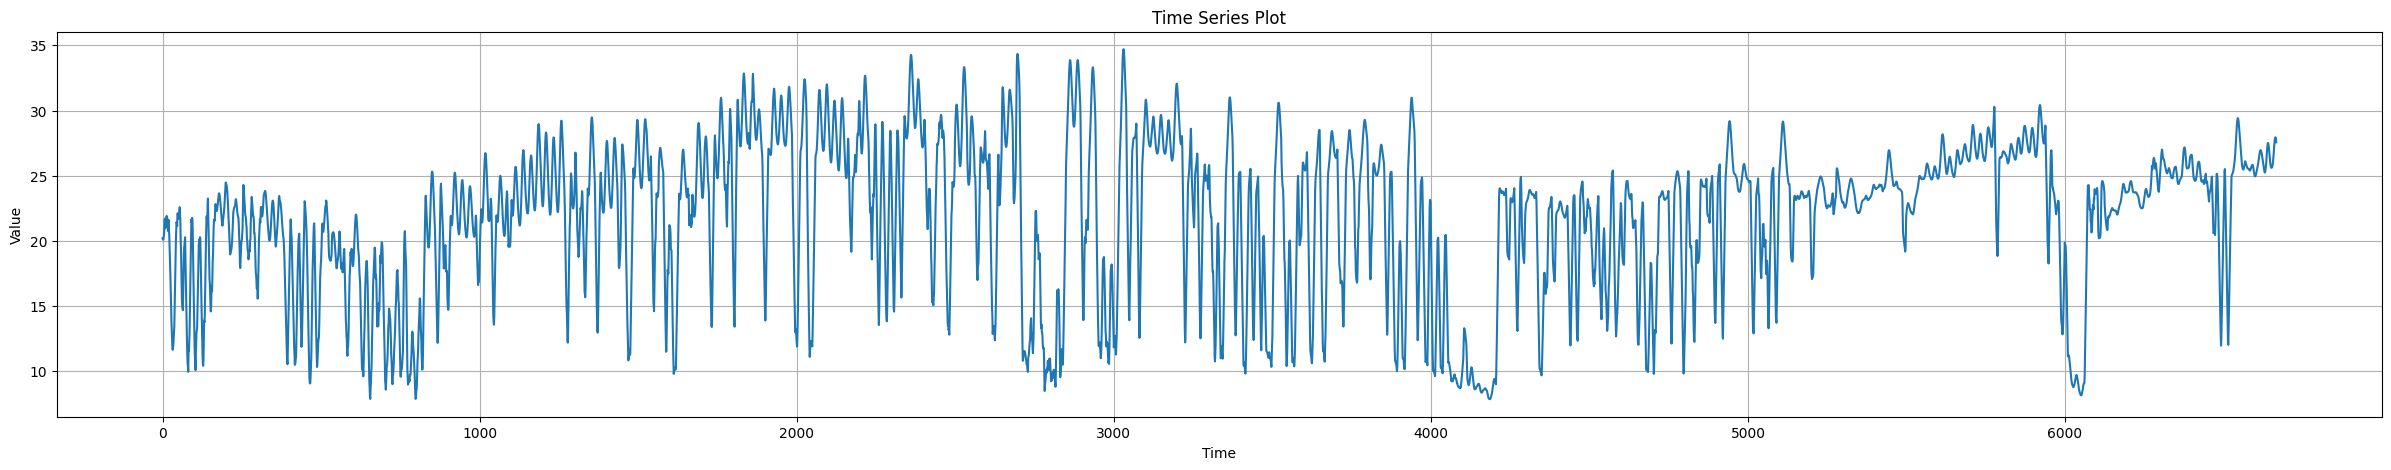

In [9]:
time = np.arange(len(ts))
plt.figure(figsize=(30, 5))
plt.plot(time, ts)
plt.title('Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

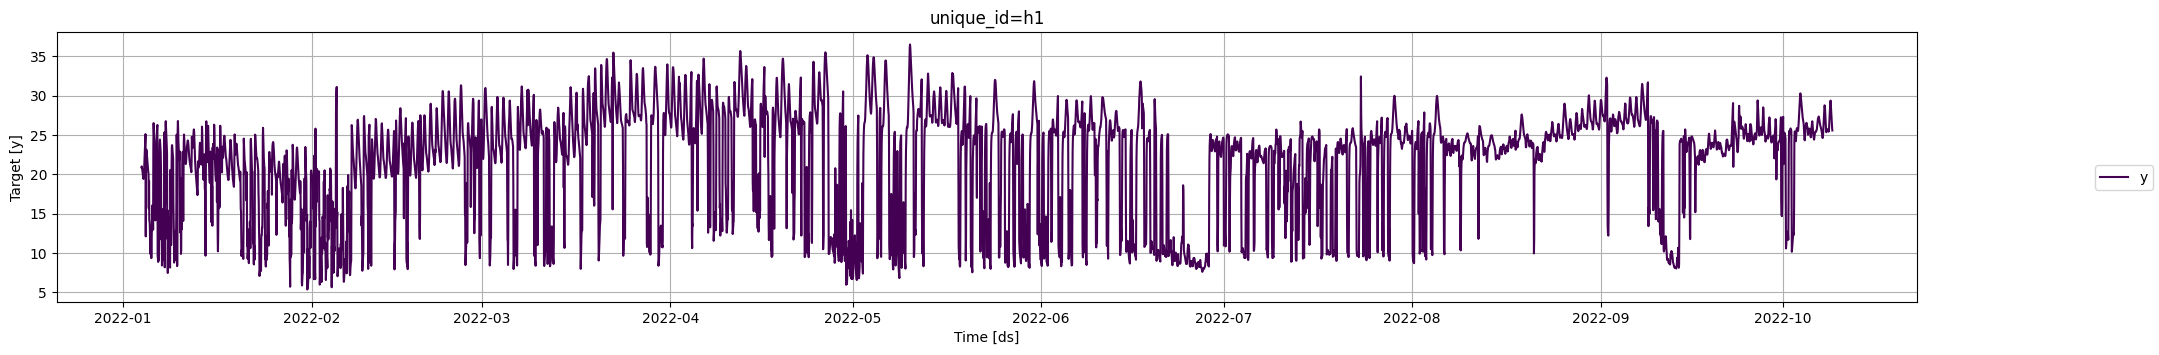

In [10]:
plot_series(df1)

In [11]:
# df1=df1.drop(columns=['DAYTON_MW',"Datetime"],inplace=True)
# df1['ds']=df1['ds'].astype(str)
df1['ds'].dtype

dtype('<M8[ns]')

In [12]:
train=df1[:5340]
test=df1[5340:]
train.shape,test.shape

((5340, 4), (1336, 4))

In [158]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')


In [96]:
from window_ops.rolling import rolling_mean, rolling_std, rolling_min, rolling_max

In [164]:
from mlforecast.target_transforms import Differences

In [165]:

model=XGBRegressor(random_state=990,learning_rate=0.01,n_estimators=1000,max_depth=20,reg_lambda=0.2)
ftsc=MLForecast(
    models={
        'xgb':model,
    },
    freq='H',
    lags=[720],
    lag_transforms={
        1:[(rolling_mean,720),(rolling_std,720),(rolling_min,720),(rolling_max,720)]
    },
    target_transforms=[Differences([720])],
    date_features=["month","day","hour"]
)
ftsc.fit(train,id_col='unique_id',time_col='ds',target_col='y',static_features=['Datetime1'])
# min_child_weight=
# ,gamma=
# ,subsample=
# objective="reg:squarederror",

MLForecast(models=[xgb], freq=H, lag_features=['lag720', 'rolling_mean_lag1_window_size720', 'rolling_std_lag1_window_size720', 'rolling_min_lag1_window_size720', 'rolling_max_lag1_window_size720'], date_features=['month', 'day', 'hour'], num_threads=1)

In [162]:
preds=ftsc.predict(1336)
preds.head()

,unique_id,ds,xgb
0,h1,2022-08-14 12:00:00,22.171093
1,h1,2022-08-14 13:00:00,22.171099
2,h1,2022-08-14 14:00:00,22.170685
3,h1,2022-08-14 15:00:00,22.170685
4,h1,2022-08-14 16:00:00,22.171099


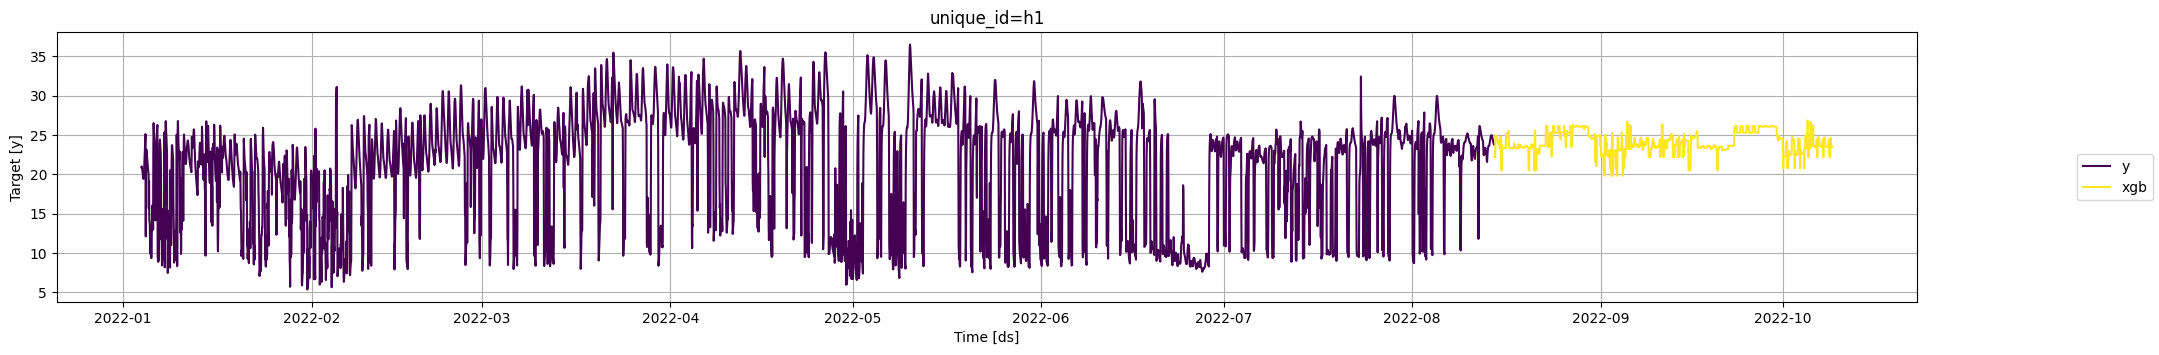

In [166]:
plot_series(train,preds,)

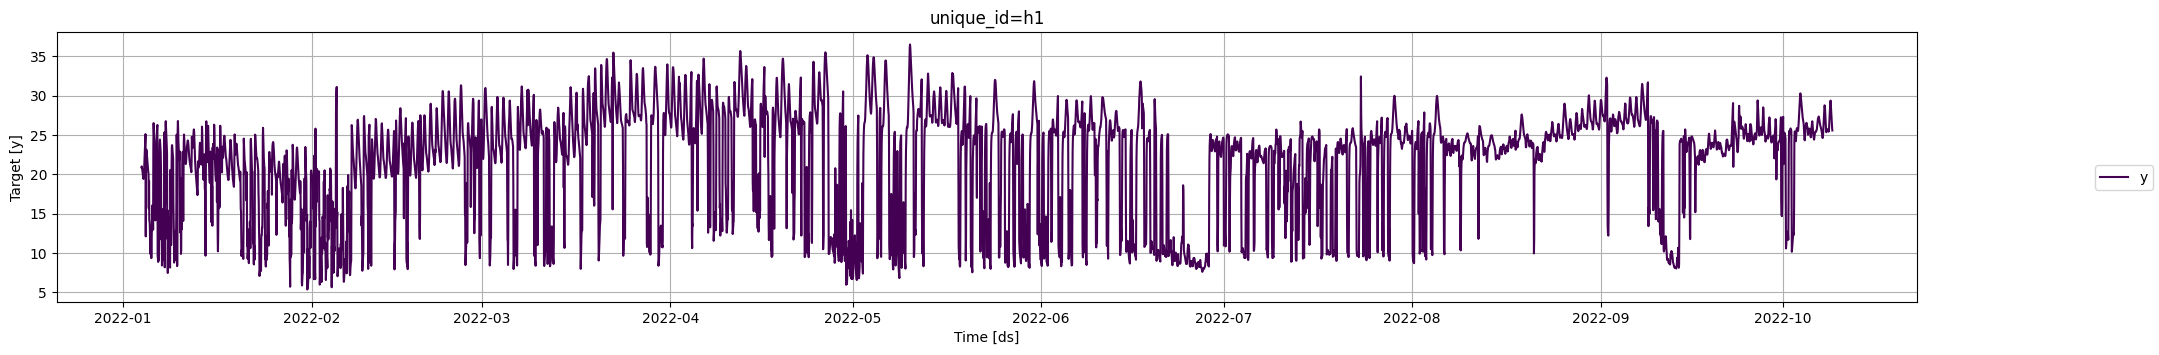

In [133]:
plot_series(df1)

In [140]:
a=[]
for i in range(9):
    a.append(df1[i*720:(i+1)*720])

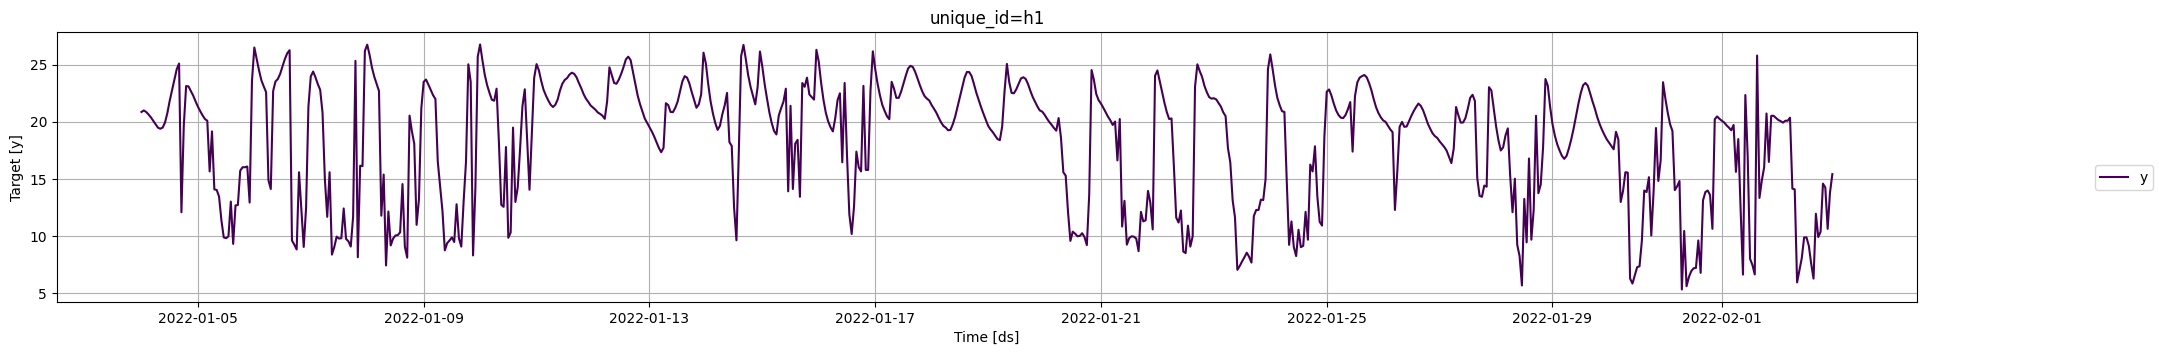

In [144]:
plot_series(a[0])

In [154]:
df1.head()

,Datetime1,unique_id,ds,y
0,0,h1,2022-01-04 00:00:00,20.867
1,1,h1,2022-01-04 01:00:00,21.000
2,2,h1,2022-01-04 02:00:00,20.867
3,3,h1,2022-01-04 03:00:00,20.650
4,4,h1,2022-01-04 04:00:00,20.400


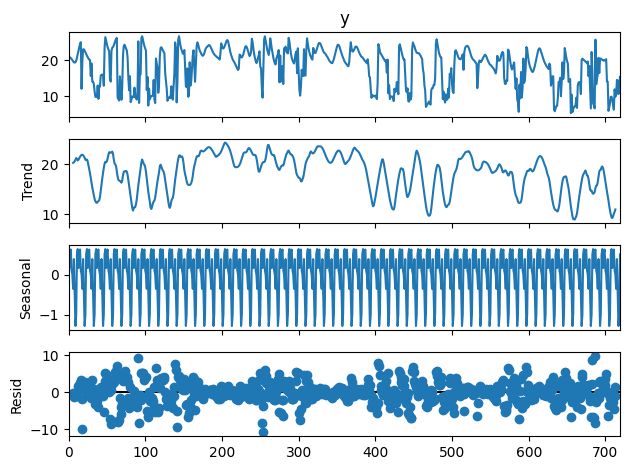

In [155]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(a[0]['y'], model='additive', period=12)
result.plot()
plt.show()
